In [1]:
# Importing the EfficientNetB4 model from TensorFlow's applications module
from tensorflow.keras.applications import EfficientNetB4
import pandas as pd  # For working with data in tabular format
import numpy as np # For numerical operations
import cv2 # For computer vision tasks
import os # For file and directory operations
import sklearn
import random  # For generating random numbers
from PIL import Image  # For working with images
import matplotlib.pyplot as plt  # For plotting graphs and images
from pathlib import Path
import seaborn as sns
print('Success') # Printing a message to indicate success

Success


In [2]:
# Specify the folder path you want to list files and directories from
folder_path = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input"
# Define the paths to the directories on your local machine
benignkeratosis_directory = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\Training\\BenignKeratosis"
melanoma_directory = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\Training\\Melanoma"
basalcell_directory = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\Training\\BasalCellCarcinoma"
squammous_directory="C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\Training\\SquamousCellCarcinoma"
# List the files and directories in each of the specified directories
benignimages=os.listdir(benignkeratosis_directory)
melanomaimages = os.listdir(melanoma_directory)
basalimages = os.listdir(basalcell_directory)
squammousimages = os.listdir(squammous_directory)
benign_count = len(benignimages)
melanoma_count = len(melanomaimages)
basal_count = len(basalimages)
squammous_count = len(squammousimages)
total_count=benign_count+melanoma_count+basal_count+squammous_count
print('The total no odf images:',total_count)

The total no odf images: 11097


In [3]:
# Path to the CSV files
csv_file_path_ground = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\ISIC_2019_Training_GroundTruth.csv"
csv_file_path_metadata = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\ISIC_2019_Training_Metadata.csv"

# Read the CSV files
ground_truth = pd.read_csv(csv_file_path_ground)
metadata = pd.read_csv(csv_file_path_metadata)

# Merge the DataFrames based on the "image" column
combined_data = pd.merge(ground_truth, metadata, on="image")

# Filter the data for the specific types (melanoma, benign, basal cell carcinoma)
filtered_data = combined_data[(combined_data['MEL'] == 1) |(combined_data['SCC'] == 1) | (combined_data['BKL'] == 1) | (combined_data['BCC'] == 1)]

# Select relevant columns (including "image", "age_approx", "anatom_site_general", "sex")
selected_data = filtered_data[["image", "age_approx", "anatom_site_general", "sex", "MEL","SCC", "BKL", "BCC"]]

# Display the combined data
print(selected_data)

# Iterate through the selected_data DataFrame and extract age, anatomical site, and sex
age_metadata = selected_data["age_approx"].values
anatom_site_metadata = selected_data["anatom_site_general"].values
sex_metadata = selected_data["sex"].values

# Convert the metadata lists to NumPy arrays
#age_metadata = np.array(age_metadata)
print(age_metadata)
#anatom_site_metadata = np.array(anatom_site_metadata)
#sex_metadata = np.array(sex_metadata)

                          image  age_approx anatom_site_general     sex  MEL  \
2                  ISIC_0000002        60.0     upper extremity  female  1.0   
4                  ISIC_0000004        80.0     posterior torso    male  1.0   
12                 ISIC_0000013        30.0     posterior torso  female  1.0   
21     ISIC_0000022_downsampled        55.0     lower extremity  female  1.0   
25     ISIC_0000026_downsampled        30.0     lower extremity  female  1.0   
...                         ...         ...                 ...     ...  ...   
25325              ISIC_0073246        80.0      anterior torso    male  0.0   
25326              ISIC_0073247        85.0           head/neck  female  0.0   
25327              ISIC_0073248        65.0      anterior torso    male  0.0   
25328              ISIC_0073249        70.0     lower extremity    male  1.0   
25330              ISIC_0073254        50.0     upper extremity    male  0.0   

       SCC  BKL  BCC  
2      0.0  0.0 

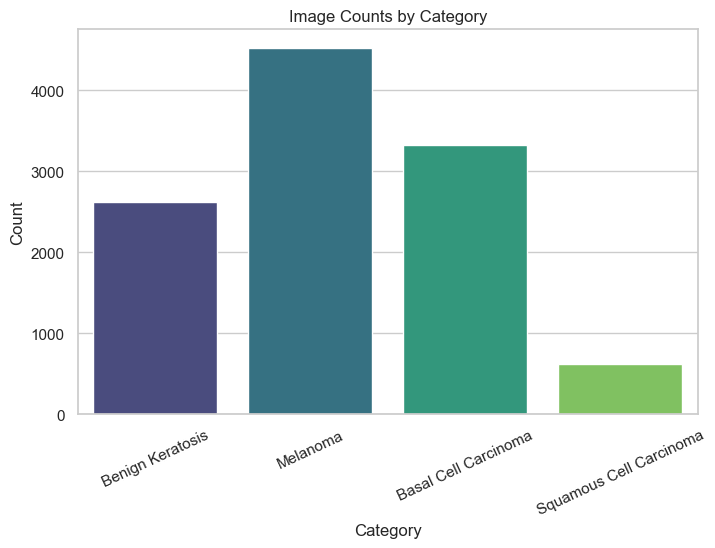

In [4]:
data = {
    'Category': ['Benign Keratosis', 'Melanoma', 'Basal Cell Carcinoma','Squamous Cell Carcinoma'],
    'Count': [benign_count, melanoma_count, basal_count,squammous_count]
}
df = pd.DataFrame(data)
# Define your custom color palette with three distinct colors
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Create the countplot
sns.barplot(x='Category', y='Count', data=df, palette='viridis')
plt.title('Image Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=25)

plt.show()

In [5]:
import re  # Import the regular expressions module

# Function to load images, assign labels, and metadata
def load_images_labels_metadata(directory, label, selected_data):
    data, labels, ages, sexes, anatomical_sites = [], [], [], [], []

    for image_path in directory.glob('*.jpg'):
        if image_path.is_file():
            image_name = image_path.stem  # Get the image filename without the extension
            try:
                image = cv2.imread(str(image_path))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (224, 224))
                data.append(image)
                labels.append(label)

                # Extract the common subportion from the image name
                match = re.search(r'ISIC_(\d+)', image_name)
                if match:
                    subportion = match.group(1)
                    # Find the corresponding metadata in selected_data based on the subportion
                    metadata_entry = selected_data[selected_data['image'].str.contains(subportion)]
                    if not metadata_entry.empty:
                        age = metadata_entry['age_approx'].values[0]
                        sex = metadata_entry['sex'].values[0]
                        anatomical_site = metadata_entry['anatom_site_general'].values[0]
                        if pd.isna(anatomical_site):
                            anatomical_site = 'unknown'
                        if pd.isna(age):
                            age = -1  # Replace missing age with -1 or any other suitable placeholder
                        if pd.isna(sex):
                            sex = 'unknown'  # Replace missing sex with 'unknown'
                        ages.append(age)
                        sexes.append(sex)
                        anatomical_sites.append(anatomical_site)
                        print(f"Loaded image: {image_path.name} with label {label}, age {age}, sex {sex}, site {anatomical_site}, size: {image.shape}")
                    else:
                        print(f"Error: No matching subportion found in image name: {image_path.name}")
                        ages.append(-1)  # Replace missing age with -1 or any other suitable placeholder
                        sexes.append('unknown')  # Replace missing sex with 'unknown'
                        anatomical_sites.append('unknown')
            except AttributeError:
                print(f"Error loading image: {image_path.name}")

    return data, labels, ages, sexes, anatomical_sites
# Load images and assign labels, age, sex, and anatomical site using the extracted metadata
benign_data, benign_labels, benign_ages, benign_sexes, benign_sites = load_images_labels_metadata(Path(benignkeratosis_directory), 0, selected_data)
melanoma_data, melanoma_labels, melanoma_ages, melanoma_sexes, melanoma_sites = load_images_labels_metadata(Path(melanoma_directory), 1, selected_data)
basal_data, basal_labels, basal_ages, basal_sexes, basal_sites = load_images_labels_metadata(Path(basalcell_directory), 2, selected_data)
squammous_data, squammous_labels, squammous_ages, squammous_sexes, squammous_sites = load_images_labels_metadata(Path(squammous_directory), 3, selected_data)

# Combine data and labels for all categories
data = np.concatenate((benign_data, melanoma_data, basal_data,squammous_data), axis=0)
labels = np.concatenate((benign_labels, melanoma_labels, basal_labels,squammous_labels), axis=0)
ages = np.concatenate((benign_ages, melanoma_ages, basal_ages,squammous_ages), axis=0)
sexes = np.concatenate((benign_sexes, melanoma_sexes, basal_sexes, squammous_sexes), axis=0)
anatomical_sites = np.concatenate((benign_sites, melanoma_sites, basal_sites,squammous_sites), axis=0)

# Verify the shape of the data and labels arrays
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)
print("Ages shape:", ages.shape)
print("Sexes shape:", sexes.shape)
print("Anatomical Sites shape:", anatomical_sites.shape)

Loaded image: benignkeratosis_ISIC_0010491.jpg with label 0, age 75.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012086_downsampled.jpg with label 0, age 30.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012090_downsampled.jpg with label 0, age 65.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012103_downsampled.jpg with label 0, age 60.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012117_downsampled.jpg with label 0, age 65.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012134_downsampled.jpg with label 0, age 75.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012136_downsampled.jpg with label 0, age 70.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012143_downsampled.jpg with label 0, age 70.0, sex male, site unknown, size: (2

Loaded image: benignkeratosis_ISIC_0012452_downsampled.jpg with label 0, age 60.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012455_downsampled.jpg with label 0, age 45.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012459_downsampled.jpg with label 0, age 45.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012469_downsampled.jpg with label 0, age 65.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012473_downsampled.jpg with label 0, age 70.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012475_downsampled.jpg with label 0, age 65.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012478_downsampled.jpg with label 0, age 75.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012492_downsampled.jpg with label 0, age 50.0, sex male, site unknown, 

Loaded image: benignkeratosis_ISIC_0013034_downsampled.jpg with label 0, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013035_downsampled.jpg with label 0, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013040_downsampled.jpg with label 0, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013052_downsampled.jpg with label 0, age 60.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013054_downsampled.jpg with label 0, age 75.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013056_downsampled.jpg with label 0, age 85.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013059_downsampled.jpg with label 0, age 70.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013063_downsampled.jp

Loaded image: benignkeratosis_ISIC_0013680_downsampled.jpg with label 0, age 55.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013682_downsampled.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013684_downsampled.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013685_downsampled.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013687_downsampled.jpg with label 0, age 35.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013691_downsampled.jpg with label 0, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013706_downsampled.jpg with label 0, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013707_downsampled.jpg with label 0, age 85.

Loaded image: benignkeratosis_ISIC_0014500_downsampled.jpg with label 0, age 75.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014503_downsampled.jpg with label 0, age 50.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014504_downsampled.jpg with label 0, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014515_downsampled.jpg with label 0, age 75.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014526_downsampled.jpg with label 0, age 65.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014535_downsampled.jpg with label 0, age 75.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014537_downsampled.jpg with label 0, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014554_downsampled.jpg with label

Loaded image: benignkeratosis_ISIC_0014641_downsampled.jpg with label 0, age 75.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014642_downsampled.jpg with label 0, age 75.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014643_downsampled.jpg with label 0, age 75.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014644_downsampled.jpg with label 0, age 70.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014645_downsampled.jpg with label 0, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014646_downsampled.jpg with label 0, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014647_downsampled.jpg with label 0, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014648_downsampled.jpg with label 0, age 70.0, sex male, site u

Loaded image: benignkeratosis_ISIC_0024612.jpg with label 0, age 85.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024623.jpg with label 0, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024626.jpg with label 0, age 70.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024635.jpg with label 0, age 60.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024643.jpg with label 0, age 35.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024672.jpg with label 0, age 65.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024676.jpg with label 0, age 75.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024696.jpg with label 0, age 75.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: benignkera

Loaded image: benignkeratosis_ISIC_0025376.jpg with label 0, age 75.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025378.jpg with label 0, age 55.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025387.jpg with label 0, age 70.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025388.jpg with label 0, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025389.jpg with label 0, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025392.jpg with label 0, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025419.jpg with label 0, age 40.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025431.jpg with label 0, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis

Loaded image: benignkeratosis_ISIC_0026153.jpg with label 0, age 70.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026159.jpg with label 0, age 45.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026174.jpg with label 0, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026205.jpg with label 0, age 35.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026219.jpg with label 0, age 60.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026245.jpg with label 0, age 45.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026248.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026249.jpg with label 0, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0

Loaded image: benignkeratosis_ISIC_0026783.jpg with label 0, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026787.jpg with label 0, age 65.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026790.jpg with label 0, age 55.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026794.jpg with label 0, age 60.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026803.jpg with label 0, age 45.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026827.jpg with label 0, age 60.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026835.jpg with label 0, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026842.jpg with label 0, age 45.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISI

Loaded image: benignkeratosis_ISIC_0027370.jpg with label 0, age 50.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027374.jpg with label 0, age 70.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027388.jpg with label 0, age 80.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027392.jpg with label 0, age 85.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027394.jpg with label 0, age 75.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027419.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027428.jpg with label 0, age 75.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027435.jpg with label 0, age 70.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: beni

Loaded image: benignkeratosis_ISIC_0028254.jpg with label 0, age 70.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028258.jpg with label 0, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028264.jpg with label 0, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028294.jpg with label 0, age 75.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028308.jpg with label 0, age 50.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028309.jpg with label 0, age 70.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028331.jpg with label 0, age 80.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028336.jpg with label 0, age 60.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratos

Loaded image: benignkeratosis_ISIC_0029062.jpg with label 0, age 65.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029068.jpg with label 0, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029070.jpg with label 0, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029080.jpg with label 0, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029100.jpg with label 0, age 65.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029101.jpg with label 0, age 50.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029102.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029107.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029108.jpg with

Loaded image: benignkeratosis_ISIC_0029576.jpg with label 0, age 70.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029580.jpg with label 0, age 60.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029585.jpg with label 0, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029588.jpg with label 0, age 40.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029596.jpg with label 0, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029600.jpg with label 0, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029603.jpg with label 0, age 70.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029612.jpg with label 0, age 65.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis

Loaded image: benignkeratosis_ISIC_0030458.jpg with label 0, age 60.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030459.jpg with label 0, age 70.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030465.jpg with label 0, age 85.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030488.jpg with label 0, age 70.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030522.jpg with label 0, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030533.jpg with label 0, age 75.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030542.jpg with label 0, age 70.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030561.jpg with label 0, age 40.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkerato

Loaded image: benignkeratosis_ISIC_0031223.jpg with label 0, age 75.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031226.jpg with label 0, age 70.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031253.jpg with label 0, age 60.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031261.jpg with label 0, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031277.jpg with label 0, age 55.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031287.jpg with label 0, age 75.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031289.jpg with label 0, age 55.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031321.jpg with label 0, age 70.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_

Loaded image: benignkeratosis_ISIC_0032045.jpg with label 0, age 75.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032051.jpg with label 0, age 50.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032063.jpg with label 0, age 50.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032099.jpg with label 0, age 85.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032103.jpg with label 0, age 70.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032111.jpg with label 0, age 75.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032113.jpg with label 0, age 45.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032116.jpg with label 0, age 75.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkerato

Loaded image: benignkeratosis_ISIC_0032756.jpg with label 0, age 60.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032757.jpg with label 0, age 45.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032763.jpg with label 0, age 70.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032773.jpg with label 0, age 70.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032776.jpg with label 0, age 55.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032778.jpg with label 0, age 55.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032804.jpg with label 0, age 85.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032826.jpg with label 0, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignk

Loaded image: benignkeratosis_ISIC_0033453.jpg with label 0, age 80.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033460.jpg with label 0, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033465.jpg with label 0, age 55.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033466.jpg with label 0, age 55.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033480.jpg with label 0, age 85.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033482.jpg with label 0, age 85.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033486.jpg with label 0, age 75.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033488.jpg with label 0, age 50.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0

Loaded image: benignkeratosis_ISIC_0034142.jpg with label 0, age 70.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034151.jpg with label 0, age 60.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034165.jpg with label 0, age 55.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034167.jpg with label 0, age 70.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034168.jpg with label 0, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034175.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034186.jpg with label 0, age -1, sex unknown, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034189.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034197

Loaded image: benignkeratosis_ISIC_0054461.jpg with label 0, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0054521.jpg with label 0, age 50.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0054543.jpg with label 0, age 75.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0054632.jpg with label 0, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0054690.jpg with label 0, age 75.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0054693.jpg with label 0, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0054708.jpg with label 0, age 60.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0054720.jpg with label 0, age 40.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: benignke

Loaded image: benignkeratosis_ISIC_0055839.jpg with label 0, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055894.jpg with label 0, age 35.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055942.jpg with label 0, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055955.jpg with label 0, age 75.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055972.jpg with label 0, age 45.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055973.jpg with label 0, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055986.jpg with label 0, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055988.jpg with label 0, age 65.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: benignkera

Loaded image: benignkeratosis_ISIC_0057160.jpg with label 0, age 65.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057210.jpg with label 0, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057222.jpg with label 0, age 50.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057245.jpg with label 0, age 40.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057248.jpg with label 0, age 40.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057250.jpg with label 0, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057272.jpg with label 0, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057289.jpg with label 0, age 50.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057290.j

Loaded image: benignkeratosis_ISIC_0058487.jpg with label 0, age 60.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0058497.jpg with label 0, age 65.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0058507.jpg with label 0, age 50.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0058509.jpg with label 0, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0058524.jpg with label 0, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0058532.jpg with label 0, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0058537.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0058558.jpg with label 0, age 40.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0058563.jp

Loaded image: benignkeratosis_ISIC_0059706.jpg with label 0, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0059710.jpg with label 0, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0059760.jpg with label 0, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0059831.jpg with label 0, age 40.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0059839.jpg with label 0, age 85.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0059841.jpg with label 0, age 60.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0059863.jpg with label 0, age 70.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0059918.jpg with label 0, age 30.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0059932.jpg with label 0,

Loaded image: benignkeratosis_ISIC_0060933.jpg with label 0, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0060966.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0060995.jpg with label 0, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0061030.jpg with label 0, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0061063.jpg with label 0, age 60.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0061069.jpg with label 0, age 40.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0061089.jpg with label 0, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0061098.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0061114.jpg wit

Loaded image: benignkeratosis_ISIC_0062055.jpg with label 0, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062066.jpg with label 0, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062094.jpg with label 0, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062110.jpg with label 0, age 60.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062119.jpg with label 0, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062124.jpg with label 0, age 55.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062126.jpg with label 0, age 65.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062146.jpg with label 0, age 55.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_006

Loaded image: benignkeratosis_ISIC_0063304.jpg with label 0, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0063311.jpg with label 0, age 35.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0063317.jpg with label 0, age 40.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0063355.jpg with label 0, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0063368.jpg with label 0, age 65.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0063371.jpg with label 0, age 50.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0063383.jpg with label 0, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0063398.jpg with label 0, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0

Loaded image: benignkeratosis_ISIC_0064741.jpg with label 0, age 60.0, sex male, site oral/genital, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064748.jpg with label 0, age 85.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064750.jpg with label 0, age 65.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064778.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064786.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064787.jpg with label 0, age 60.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064793.jpg with label 0, age 55.0, sex female, site oral/genital, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064810.jpg with label 0, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_

Loaded image: benignkeratosis_ISIC_0065909.jpg with label 0, age 55.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0065935.jpg with label 0, age 50.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0065951.jpg with label 0, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0065964.jpg with label 0, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0065966.jpg with label 0, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0065993.jpg with label 0, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0066007.jpg with label 0, age 55.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0066013.jpg with label 0, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0066021.jpg with la

Loaded image: benignkeratosis_ISIC_0067125.jpg with label 0, age 60.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0067136.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0067258.jpg with label 0, age 80.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0067273.jpg with label 0, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0067283.jpg with label 0, age 40.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0067408.jpg with label 0, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0067411.jpg with label 0, age 80.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0067423.jpg with label 0, age 40.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0067477

Loaded image: benignkeratosis_ISIC_0068596.jpg with label 0, age 20.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068599.jpg with label 0, age 40.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068624.jpg with label 0, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068681.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068687.jpg with label 0, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068691.jpg with label 0, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068733.jpg with label 0, age 50.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068794.jpg with label 0, age 50.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_00688

Loaded image: benignkeratosis_ISIC_0069768.jpg with label 0, age 50.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0069790.jpg with label 0, age 40.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0069806.jpg with label 0, age 35.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0069826.jpg with label 0, age 75.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0069848.jpg with label 0, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0069849.jpg with label 0, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0069853.jpg with label 0, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0069875.jpg with label 0, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_IS

Loaded image: benignkeratosis_ISIC_0071013.jpg with label 0, age 40.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0071038.jpg with label 0, age 30.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0071041.jpg with label 0, age 55.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0071054.jpg with label 0, age 75.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0071075.jpg with label 0, age 50.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0071076.jpg with label 0, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0071080.jpg with label 0, age 65.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0071087.jpg with label 0, age 50.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_IS

Loaded image: benignkeratosis_ISIC_0072257.jpg with label 0, age 50.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072262.jpg with label 0, age 35.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072296.jpg with label 0, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072322.jpg with label 0, age 40.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072343.jpg with label 0, age 50.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072357.jpg with label 0, age 50.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072370.jpg with label 0, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072397.jpg with label 0, age 35.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072410.jpg

Loaded image: melanoma_ISIC_0000049_downsampled.jpg with label 1, age 80.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000054_downsampled.jpg with label 1, age 25.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000056_downsampled.jpg with label 1, age 55.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000074.jpg with label 1, age 25.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000077_downsampled.jpg with label 1, age 80.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000078_downsampled.jpg with label 1, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000139_downsampled.jpg with label 1, age -1, sex unknown, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000140_downsampled.jpg with label 1, age -1, sex unknown, site unknown, size: (224, 224, 

Loaded image: melanoma_ISIC_0000410_downsampled.jpg with label 1, age -1, sex unknown, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000412_downsampled.jpg with label 1, age -1, sex unknown, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000413_downsampled.jpg with label 1, age -1, sex unknown, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000415_downsampled.jpg with label 1, age -1, sex unknown, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000420_downsampled.jpg with label 1, age -1, sex unknown, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000434_downsampled.jpg with label 1, age -1, sex unknown, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000444_downsampled.jpg with label 1, age -1, sex unknown, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000445_downsampled.jpg with label 1, age -1, sex unknown, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000

Loaded image: melanoma_ISIC_0010231.jpg with label 1, age 85.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0010235.jpg with label 1, age 60.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0010240.jpg with label 1, age 70.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0010241.jpg with label 1, age 70.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0010251.jpg with label 1, age 60.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0010265.jpg with label 1, age 65.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0010267.jpg with label 1, age 65.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0010319.jpg with label 1, age 65.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0010321.jpg with label 1, age 80.0, sex 

Loaded image: melanoma_ISIC_0012450_downsampled.jpg with label 1, age 50.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012512_downsampled.jpg with label 1, age 75.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012678_downsampled.jpg with label 1, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012701_downsampled.jpg with label 1, age 70.0, sex male, site lateral torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012715_downsampled.jpg with label 1, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012749_downsampled.jpg with label 1, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012756_downsampled.jpg with label 1, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012758.jpg with label 1, age 45.0, sex male, site lateral torso, size: (224, 224, 3)
Loaded image: melanoma_IS

Loaded image: melanoma_ISIC_0013652_downsampled.jpg with label 1, age 75.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013663_downsampled.jpg with label 1, age 55.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013671_downsampled.jpg with label 1, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013672_downsampled.jpg with label 1, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013674_downsampled.jpg with label 1, age 60.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013678_downsampled.jpg with label 1, age 55.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013696_downsampled.jpg with label 1, age 70.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013702_downsampled.jpg with label 1, age 40.0, sex male, site anterior 

Loaded image: melanoma_ISIC_0014110_downsampled.jpg with label 1, age 70.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014127_downsampled.jpg with label 1, age 50.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014129_downsampled.jpg with label 1, age 60.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014132_downsampled.jpg with label 1, age 50.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014133_downsampled.jpg with label 1, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014136_downsampled.jpg with label 1, age 75.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014144_downsampled.jpg with label 1, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014148_downsampled.jpg with label 1, age 70.0, sex male, site head/neck, size: (224, 

Loaded image: melanoma_ISIC_0014513_downsampled.jpg with label 1, age 70.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014518_downsampled.jpg with label 1, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014525_downsampled.jpg with label 1, age 75.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014527_downsampled.jpg with label 1, age 65.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014541_downsampled.jpg with label 1, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014542_downsampled.jpg with label 1, age 70.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014543_downsampled.jpg with label 1, age 55.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014545_downsampled.jpg with label 1, age 55.0, sex female, site anterior 

Loaded image: melanoma_ISIC_0015124_downsampled.jpg with label 1, age 45.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0015127_downsampled.jpg with label 1, age -1, sex unknown, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0015132_downsampled.jpg with label 1, age 75.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0015133_downsampled.jpg with label 1, age -1, sex unknown, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0015136_downsampled.jpg with label 1, age 65.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0015142_downsampled.jpg with label 1, age -1, sex unknown, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0015156_downsampled.jpg with label 1, age 65.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0015163_downsampled.jpg with label 1, age 75.0, sex female, site head/ne

Loaded image: melanoma_ISIC_0024961.jpg with label 1, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024962.jpg with label 1, age 35.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024967.jpg with label 1, age 60.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024972.jpg with label 1, age 75.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024987.jpg with label 1, age 75.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024999.jpg with label 1, age 50.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0025018.jpg with label 1, age 45.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0025035.jpg with label 1, age 70.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0025081.jpg with label 1, age 30.0, sex female, site anterior t

Loaded image: melanoma_ISIC_0026115.jpg with label 1, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026120.jpg with label 1, age 55.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026131.jpg with label 1, age 75.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026150.jpg with label 1, age 50.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026158.jpg with label 1, age 75.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026167.jpg with label 1, age 50.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026188.jpg with label 1, age 70.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026207.jpg with label 1, age 45.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026229.jpg with label 1, age 65.0, sex male, site an

Loaded image: melanoma_ISIC_0027163.jpg with label 1, age 60.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027171.jpg with label 1, age 45.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027174.jpg with label 1, age 50.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027179.jpg with label 1, age 85.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027187.jpg with label 1, age 65.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027190.jpg with label 1, age 80.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027204.jpg with label 1, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027234.jpg with label 1, age 65.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027238.jpg with label 1, age 55.0, sex female,

Loaded image: melanoma_ISIC_0028051.jpg with label 1, age 45.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028056.jpg with label 1, age 85.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028065.jpg with label 1, age 60.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028069.jpg with label 1, age 35.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028075.jpg with label 1, age 55.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028082.jpg with label 1, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028086.jpg with label 1, age 60.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028087.jpg with label 1, age 65.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028103.jpg with label 1, age 70.0, sex female, site

Loaded image: melanoma_ISIC_0029021.jpg with label 1, age 65.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0029028.jpg with label 1, age 85.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0029033.jpg with label 1, age 30.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0029056.jpg with label 1, age 85.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0029081.jpg with label 1, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0029089.jpg with label 1, age 70.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0029092.jpg with label 1, age 65.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0029094.jpg with label 1, age 45.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0029146.jpg with label 1, age 65.0, sex mal

Loaded image: melanoma_ISIC_0030089.jpg with label 1, age 55.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030106.jpg with label 1, age 70.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030107.jpg with label 1, age 20.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030110.jpg with label 1, age 50.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030119.jpg with label 1, age 75.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030122.jpg with label 1, age 55.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030129.jpg with label 1, age 55.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030134.jpg with label 1, age 30.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030150.jpg with label 1, age 80.0, sex f

Loaded image: melanoma_ISIC_0030970.jpg with label 1, age 50.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030995.jpg with label 1, age 55.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031005.jpg with label 1, age 65.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031013.jpg with label 1, age 65.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031023.jpg with label 1, age 60.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031025.jpg with label 1, age 60.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031034.jpg with label 1, age 75.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031077.jpg with label 1, age 65.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031087.jpg with label 1, age 65.0, sex male, site 

Loaded image: melanoma_ISIC_0032149.jpg with label 1, age 50.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032152.jpg with label 1, age 50.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032182.jpg with label 1, age 70.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032187.jpg with label 1, age 70.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032190.jpg with label 1, age 60.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032192.jpg with label 1, age 80.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032197.jpg with label 1, age 50.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032204.jpg with label 1, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032207.jpg with label 1, age 35.0, sex female, site up

Loaded image: melanoma_ISIC_0032699.jpg with label 1, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032709.jpg with label 1, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032716.jpg with label 1, age 55.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032718.jpg with label 1, age 65.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032722.jpg with label 1, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032723.jpg with label 1, age 25.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032724.jpg with label 1, age 50.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032726.jpg with label 1, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032730.jpg with label 1, age 80.0, sex female, site hea

Loaded image: melanoma_ISIC_0033063.jpg with label 1, age 70.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033068.jpg with label 1, age 80.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033073.jpg with label 1, age 65.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033074.jpg with label 1, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033081.jpg with label 1, age 55.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033089.jpg with label 1, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033099.jpg with label 1, age 40.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033103.jpg with label 1, age 65.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033114.jpg with label 1, age 45.0, sex female,

Loaded image: melanoma_ISIC_0033452.jpg with label 1, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033454.jpg with label 1, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033469.jpg with label 1, age 65.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033470.jpg with label 1, age 55.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033473.jpg with label 1, age 65.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033476.jpg with label 1, age 25.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033477.jpg with label 1, age 65.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033479.jpg with label 1, age 40.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033485.jpg with label 1, age 60.0, sex male, sit

Loaded image: melanoma_ISIC_0033871.jpg with label 1, age 30.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033872.jpg with label 1, age 75.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033874.jpg with label 1, age 65.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033878.jpg with label 1, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033881.jpg with label 1, age 40.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033883.jpg with label 1, age 55.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033885.jpg with label 1, age 60.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033886.jpg with label 1, age 60.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033893.jpg with label 1, age 60.0, sex male, sit

Loaded image: melanoma_ISIC_0034222.jpg with label 1, age 30.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0034233.jpg with label 1, age 50.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0034236.jpg with label 1, age 55.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0034239.jpg with label 1, age 85.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0034242.jpg with label 1, age 45.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0034243.jpg with label 1, age 45.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0034246.jpg with label 1, age 65.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0034253.jpg with label 1, age 60.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0034256.jpg with label 1, age 70.0, sex male, site post

Loaded image: melanoma_ISIC_0053816.jpg with label 1, age 60.0, sex female, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053824.jpg with label 1, age 50.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053827.jpg with label 1, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053828.jpg with label 1, age 75.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053839.jpg with label 1, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053841.jpg with label 1, age 45.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053843.jpg with label 1, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053846.jpg with label 1, age 25.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053854.jpg with label 1, age 70.0, sex male, si

Loaded image: melanoma_ISIC_0054312.jpg with label 1, age 75.0, sex female, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054317.jpg with label 1, age 75.0, sex female, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054329.jpg with label 1, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054332.jpg with label 1, age 55.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054334.jpg with label 1, age 80.0, sex male, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054341.jpg with label 1, age 55.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054350.jpg with label 1, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054351.jpg with label 1, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054355.jpg with label 1, age 60.0, sex female, site palms/soles, size: 

Loaded image: melanoma_ISIC_0054892.jpg with label 1, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054904.jpg with label 1, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054906.jpg with label 1, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054912.jpg with label 1, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054914.jpg with label 1, age 65.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054919.jpg with label 1, age 60.0, sex female, site oral/genital, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054932.jpg with label 1, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054936.jpg with label 1, age 65.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054941.jpg with label 1, age 70.0, sex male, site anterior 

Loaded image: melanoma_ISIC_0055317.jpg with label 1, age 70.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055318.jpg with label 1, age 50.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055327.jpg with label 1, age 60.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055337.jpg with label 1, age 50.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055340.jpg with label 1, age 65.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055359.jpg with label 1, age 35.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055361.jpg with label 1, age 30.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055362.jpg with label 1, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055367.jpg with label 1, age 85.0, sex ma

Loaded image: melanoma_ISIC_0055828.jpg with label 1, age 50.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055832.jpg with label 1, age 50.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055840.jpg with label 1, age 60.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055841.jpg with label 1, age 80.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055859.jpg with label 1, age 60.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055862.jpg with label 1, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055876.jpg with label 1, age 45.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055887.jpg with label 1, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055892.jpg with label 1, age 80.0, sex 

Loaded image: melanoma_ISIC_0056319.jpg with label 1, age 50.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056330.jpg with label 1, age -1, sex unknown, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056346.jpg with label 1, age 25.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056364.jpg with label 1, age 35.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056389.jpg with label 1, age 65.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056403.jpg with label 1, age 70.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056406.jpg with label 1, age 25.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056409.jpg with label 1, age 50.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056413.jpg with label 1, age 60.0, sex female, si

Loaded image: melanoma_ISIC_0056922.jpg with label 1, age 70.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056926.jpg with label 1, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056937.jpg with label 1, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056938.jpg with label 1, age 70.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056940.jpg with label 1, age 50.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056957.jpg with label 1, age 85.0, sex male, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056967.jpg with label 1, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056969.jpg with label 1, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056974.jpg with label 1, age 80.0, sex female, site 

Loaded image: melanoma_ISIC_0057408.jpg with label 1, age 70.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057412.jpg with label 1, age 50.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057417.jpg with label 1, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057436.jpg with label 1, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057450.jpg with label 1, age 50.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057457.jpg with label 1, age 60.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057462.jpg with label 1, age 65.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057482.jpg with label 1, age 45.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057496.jpg with label 1, age 35.0, sex male,

Loaded image: melanoma_ISIC_0057960.jpg with label 1, age 55.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057963.jpg with label 1, age 35.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057973.jpg with label 1, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057974.jpg with label 1, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057978.jpg with label 1, age -1, sex unknown, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057980.jpg with label 1, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057996.jpg with label 1, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057997.jpg with label 1, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057999.jpg with label 1, age 85.0, sex male, site anterior torso, s

Loaded image: melanoma_ISIC_0058448.jpg with label 1, age 35.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058453.jpg with label 1, age 35.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058458.jpg with label 1, age 70.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058465.jpg with label 1, age 80.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058471.jpg with label 1, age 80.0, sex male, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058496.jpg with label 1, age 15.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058501.jpg with label 1, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058508.jpg with label 1, age 70.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058513.jpg with label 1, age 85.0, sex female, site lower ex

Loaded image: melanoma_ISIC_0059065.jpg with label 1, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059066.jpg with label 1, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059069.jpg with label 1, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059074.jpg with label 1, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059076.jpg with label 1, age 50.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059077.jpg with label 1, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059079.jpg with label 1, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059082.jpg with label 1, age 40.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059089.jpg with label 1, age 85.0, sex male, site anterior torso, si

Loaded image: melanoma_ISIC_0059512.jpg with label 1, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059513.jpg with label 1, age 60.0, sex female, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059525.jpg with label 1, age 55.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059532.jpg with label 1, age 65.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059538.jpg with label 1, age 50.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059547.jpg with label 1, age 65.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059551.jpg with label 1, age 30.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059554.jpg with label 1, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059569.jpg with label 1, age 65.0, sex male, site

Loaded image: melanoma_ISIC_0060154.jpg with label 1, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060155.jpg with label 1, age 50.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060159.jpg with label 1, age 65.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060163.jpg with label 1, age 55.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060194.jpg with label 1, age 50.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060215.jpg with label 1, age 75.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060216.jpg with label 1, age 45.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060218.jpg with label 1, age 35.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060219.jpg with label 1, age 80.0, sex female, s

Loaded image: melanoma_ISIC_0060696.jpg with label 1, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060698.jpg with label 1, age 60.0, sex female, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060700.jpg with label 1, age 55.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060703.jpg with label 1, age 35.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060713.jpg with label 1, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060717.jpg with label 1, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060718.jpg with label 1, age 65.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060728.jpg with label 1, age 40.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060731.jpg with label 1, age 80.0, sex female, site anterior t

Loaded image: melanoma_ISIC_0061188.jpg with label 1, age 50.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061189.jpg with label 1, age 65.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061194.jpg with label 1, age 45.0, sex male, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061195.jpg with label 1, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061224.jpg with label 1, age 50.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061231.jpg with label 1, age 55.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061244.jpg with label 1, age 70.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061250.jpg with label 1, age 25.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061252.jpg with label 1, age 75.0, sex male,

Loaded image: melanoma_ISIC_0061660.jpg with label 1, age 50.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061664.jpg with label 1, age 50.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061670.jpg with label 1, age 75.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061680.jpg with label 1, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061684.jpg with label 1, age 35.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061685.jpg with label 1, age 40.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061686.jpg with label 1, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061699.jpg with label 1, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061701.jpg with label 1, age 65.0, sex female, 

Loaded image: melanoma_ISIC_0062115.jpg with label 1, age 60.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062125.jpg with label 1, age -1, sex unknown, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062133.jpg with label 1, age 60.0, sex female, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062138.jpg with label 1, age 60.0, sex female, site oral/genital, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062141.jpg with label 1, age 30.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062155.jpg with label 1, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062158.jpg with label 1, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062160.jpg with label 1, age 50.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062161.jpg with label 1, age 45.0, sex male, site

Loaded image: melanoma_ISIC_0062628.jpg with label 1, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062632.jpg with label 1, age 50.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062633.jpg with label 1, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062636.jpg with label 1, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062639.jpg with label 1, age 45.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062649.jpg with label 1, age 60.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062674.jpg with label 1, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062680.jpg with label 1, age 55.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062684.jpg with label 1, age 60.0, sex female, site hea

Loaded image: melanoma_ISIC_0063143.jpg with label 1, age 50.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063148.jpg with label 1, age 50.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063151.jpg with label 1, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063153.jpg with label 1, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063157.jpg with label 1, age 50.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063164.jpg with label 1, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063168.jpg with label 1, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063172.jpg with label 1, age 40.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063174.jpg with label 1, age 80.0, sex female, site head/neck, s

Loaded image: melanoma_ISIC_0063742.jpg with label 1, age 80.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063748.jpg with label 1, age 75.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063753.jpg with label 1, age 70.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063757.jpg with label 1, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063766.jpg with label 1, age 70.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063769.jpg with label 1, age 60.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063775.jpg with label 1, age 70.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063792.jpg with label 1, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063793.jpg with label 1, age 65.0, sex male, site

Loaded image: melanoma_ISIC_0064279.jpg with label 1, age 35.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064281.jpg with label 1, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064298.jpg with label 1, age 55.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064307.jpg with label 1, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064320.jpg with label 1, age 55.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064321.jpg with label 1, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064328.jpg with label 1, age 30.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064337.jpg with label 1, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064339.jpg with label 1, age 70.0, sex male, 

Loaded image: melanoma_ISIC_0064829.jpg with label 1, age 70.0, sex male, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064836.jpg with label 1, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064851.jpg with label 1, age 80.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064860.jpg with label 1, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064863.jpg with label 1, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064868.jpg with label 1, age 50.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064874.jpg with label 1, age 25.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064875.jpg with label 1, age 40.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064877.jpg with label 1, age 40.0, sex male, sit

Loaded image: melanoma_ISIC_0065283.jpg with label 1, age 80.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065305.jpg with label 1, age 40.0, sex female, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065307.jpg with label 1, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065313.jpg with label 1, age 35.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065315.jpg with label 1, age 65.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065324.jpg with label 1, age 60.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065338.jpg with label 1, age 70.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065341.jpg with label 1, age 35.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065346.jpg with label 1, age 85.0, sex male, s

Loaded image: melanoma_ISIC_0065806.jpg with label 1, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065807.jpg with label 1, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065813.jpg with label 1, age 80.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065823.jpg with label 1, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065843.jpg with label 1, age 80.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065853.jpg with label 1, age 55.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065858.jpg with label 1, age 70.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065864.jpg with label 1, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065872.jpg with label 1, age 75.0, sex fema

Loaded image: melanoma_ISIC_0066359.jpg with label 1, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066367.jpg with label 1, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066376.jpg with label 1, age 65.0, sex female, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066378.jpg with label 1, age 70.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066379.jpg with label 1, age 40.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066382.jpg with label 1, age 75.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066384.jpg with label 1, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066386.jpg with label 1, age 50.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066390.jpg with label 1, age 55.0, sex female, sit

Loaded image: melanoma_ISIC_0066860.jpg with label 1, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066867.jpg with label 1, age 40.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066878.jpg with label 1, age 55.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066882.jpg with label 1, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066888.jpg with label 1, age 75.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066907.jpg with label 1, age 45.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066910.jpg with label 1, age -1, sex unknown, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066921.jpg with label 1, age 45.0, sex male, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066935.jpg with label 1, age 75.0, sex male, site head/nec

Loaded image: melanoma_ISIC_0067487.jpg with label 1, age 50.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067488.jpg with label 1, age 70.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067495.jpg with label 1, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067502.jpg with label 1, age 20.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067510.jpg with label 1, age 55.0, sex male, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067511.jpg with label 1, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067512.jpg with label 1, age 55.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067513.jpg with label 1, age 50.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067515.jpg with label 1, age 65.0, sex female, site ante

Loaded image: melanoma_ISIC_0067953.jpg with label 1, age 75.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067960.jpg with label 1, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067969.jpg with label 1, age 40.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067972.jpg with label 1, age 40.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067979.jpg with label 1, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067985.jpg with label 1, age 55.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068000.jpg with label 1, age 40.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068003.jpg with label 1, age 55.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068011.jpg with label 1, age 45.0, sex ma

Loaded image: melanoma_ISIC_0068460.jpg with label 1, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068477.jpg with label 1, age 40.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068488.jpg with label 1, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068495.jpg with label 1, age 35.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068515.jpg with label 1, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068527.jpg with label 1, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068528.jpg with label 1, age 45.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068545.jpg with label 1, age 50.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068548.jpg with label 1, age 40.0, sex male, s

Loaded image: melanoma_ISIC_0068941.jpg with label 1, age 45.0, sex male, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068950.jpg with label 1, age 50.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068961.jpg with label 1, age 85.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068962.jpg with label 1, age 45.0, sex male, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068966.jpg with label 1, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068975.jpg with label 1, age 75.0, sex female, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068979.jpg with label 1, age 70.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068993.jpg with label 1, age 55.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069003.jpg with label 1, age 55.0, sex male, site anterior 

Loaded image: melanoma_ISIC_0069514.jpg with label 1, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069515.jpg with label 1, age 75.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069536.jpg with label 1, age 50.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069540.jpg with label 1, age 50.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069556.jpg with label 1, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069558.jpg with label 1, age 30.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069583.jpg with label 1, age 60.0, sex female, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069591.jpg with label 1, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069592.jpg with label 1, age 55.0, sex female, 

Loaded image: melanoma_ISIC_0070111.jpg with label 1, age 50.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070118.jpg with label 1, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070120.jpg with label 1, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070123.jpg with label 1, age 50.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070129.jpg with label 1, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070137.jpg with label 1, age 50.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070140.jpg with label 1, age 80.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070149.jpg with label 1, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070160.jpg with label 1, age 40.0, sex female, 

Loaded image: melanoma_ISIC_0070614.jpg with label 1, age 45.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070623.jpg with label 1, age 45.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070629.jpg with label 1, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070657.jpg with label 1, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070666.jpg with label 1, age 70.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070689.jpg with label 1, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070709.jpg with label 1, age 45.0, sex female, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070710.jpg with label 1, age 65.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070711.jpg with label 1, age 60.0, sex male, site a

Loaded image: melanoma_ISIC_0071193.jpg with label 1, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071196.jpg with label 1, age 45.0, sex male, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071197.jpg with label 1, age 75.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071208.jpg with label 1, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071218.jpg with label 1, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071239.jpg with label 1, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071245.jpg with label 1, age 45.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071257.jpg with label 1, age 35.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071258.jpg with label 1, age 60.0, sex male, site head/neck, size:

Loaded image: melanoma_ISIC_0071765.jpg with label 1, age 60.0, sex female, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071767.jpg with label 1, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071768.jpg with label 1, age 60.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071771.jpg with label 1, age 40.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071776.jpg with label 1, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071778.jpg with label 1, age 45.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071782.jpg with label 1, age 85.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071783.jpg with label 1, age 40.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071788.jpg with label 1, age 85.0, sex female, site hea

Loaded image: melanoma_ISIC_0072215.jpg with label 1, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072218.jpg with label 1, age 75.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072223.jpg with label 1, age 50.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072230.jpg with label 1, age 45.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072241.jpg with label 1, age 65.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072252.jpg with label 1, age 55.0, sex male, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072271.jpg with label 1, age 35.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072280.jpg with label 1, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072286.jpg with label 1, age 35.0, sex fema

Loaded image: melanoma_ISIC_0072730.jpg with label 1, age 85.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072733.jpg with label 1, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072738.jpg with label 1, age 65.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072747.jpg with label 1, age 80.0, sex female, site palms/soles, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072748.jpg with label 1, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072755.jpg with label 1, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072768.jpg with label 1, age 50.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072773.jpg with label 1, age 50.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072785.jpg with label 1, age 75.0, sex female, site u

Loaded image: basalcell_ISIC_0024432.jpg with label 2, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0024436.jpg with label 2, age 80.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0024443.jpg with label 2, age 55.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0024448.jpg with label 2, age 65.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0024452.jpg with label 2, age 40.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0024454.jpg with label 2, age 80.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0024457.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0024461.jpg with label 2, age 80.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0024472.jpg with label 2, age 85.0, sex male,

Loaded image: basalcell_ISIC_0026337.jpg with label 2, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0026343.jpg with label 2, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0026350.jpg with label 2, age 30.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0026395.jpg with label 2, age 50.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0026433.jpg with label 2, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0026439.jpg with label 2, age 35.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0026442.jpg with label 2, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0026453.jpg with label 2, age 55.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0026496.jpg with label 2, age 70.0, se

Loaded image: basalcell_ISIC_0027722.jpg with label 2, age 70.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027744.jpg with label 2, age 50.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027759.jpg with label 2, age 60.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027774.jpg with label 2, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027786.jpg with label 2, age 55.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027788.jpg with label 2, age 75.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027814.jpg with label 2, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027819.jpg with label 2, age 50.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027825.jpg with label 2, age 55.0, s

Loaded image: basalcell_ISIC_0028937.jpg with label 2, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0028964.jpg with label 2, age 45.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0028973.jpg with label 2, age 85.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0028978.jpg with label 2, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0028980.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0028989.jpg with label 2, age 65.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0028994.jpg with label 2, age 85.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0029020.jpg with label 2, age 50.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0029034.jpg with label 2, age 75.0, sex male

Loaded image: basalcell_ISIC_0030233.jpg with label 2, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0030249.jpg with label 2, age 80.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0030261.jpg with label 2, age 70.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0030271.jpg with label 2, age 75.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0030314.jpg with label 2, age 40.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0030335.jpg with label 2, age 60.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0030339.jpg with label 2, age 75.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0030349.jpg with label 2, age 75.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0030352.jpg with label 2, age 70.0, se

Loaded image: basalcell_ISIC_0031728.jpg with label 2, age 55.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031749.jpg with label 2, age 40.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031762.jpg with label 2, age 75.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031789.jpg with label 2, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031824.jpg with label 2, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031836.jpg with label 2, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031925.jpg with label 2, age 75.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031943.jpg with label 2, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031971.jpg with label 2, age 70.0, sex male, site un

Loaded image: basalcell_ISIC_0034047.jpg with label 2, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0034058.jpg with label 2, age 70.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0034066.jpg with label 2, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0034093.jpg with label 2, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0034095.jpg with label 2, age 25.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0034119.jpg with label 2, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0034123.jpg with label 2, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0034143.jpg with label 2, age 25.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0034155.jpg with label 2, age 45.0, sex female, site unk

Loaded image: basalcell_ISIC_0053972.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0053976.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0053993.jpg with label 2, age 25.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054018.jpg with label 2, age 60.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054031.jpg with label 2, age 85.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054036.jpg with label 2, age 75.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054055.jpg with label 2, age 70.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054060.jpg with label 2, age 75.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054063.jpg with label 2, age 50.0, sex f

Loaded image: basalcell_ISIC_0054504.jpg with label 2, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054518.jpg with label 2, age 30.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054524.jpg with label 2, age 70.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054530.jpg with label 2, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054535.jpg with label 2, age 75.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054539.jpg with label 2, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054542.jpg with label 2, age 70.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054552.jpg with label 2, age 65.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054567.jpg with label 2, age 55.0, 

Loaded image: basalcell_ISIC_0055032.jpg with label 2, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055038.jpg with label 2, age 60.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055050.jpg with label 2, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055058.jpg with label 2, age 50.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055059.jpg with label 2, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055060.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055065.jpg with label 2, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055068.jpg with label 2, age 75.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055075.jpg with label 2, age 80.0, sex 

Loaded image: basalcell_ISIC_0055584.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055600.jpg with label 2, age 70.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055604.jpg with label 2, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055606.jpg with label 2, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055614.jpg with label 2, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055629.jpg with label 2, age 50.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055638.jpg with label 2, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055641.jpg with label 2, age 35.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055647.jpg with label 2, age 55.0, sex female, site ante

Loaded image: basalcell_ISIC_0056027.jpg with label 2, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056030.jpg with label 2, age 75.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056039.jpg with label 2, age 70.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056042.jpg with label 2, age 70.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056083.jpg with label 2, age 55.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056088.jpg with label 2, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056095.jpg with label 2, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056097.jpg with label 2, age 60.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056099.jpg with label 2, age 75.0, sex fe

Loaded image: basalcell_ISIC_0056703.jpg with label 2, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056709.jpg with label 2, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056714.jpg with label 2, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056730.jpg with label 2, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056731.jpg with label 2, age 60.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056737.jpg with label 2, age 50.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056742.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056747.jpg with label 2, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056766.jpg with label 2, age 70.0, sex male, site head/neck, si

Loaded image: basalcell_ISIC_0057308.jpg with label 2, age 70.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057318.jpg with label 2, age 80.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057333.jpg with label 2, age 65.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057334.jpg with label 2, age 60.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057336.jpg with label 2, age 85.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057347.jpg with label 2, age 50.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057349.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057352.jpg with label 2, age 65.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057355.jpg with label 2, age 80.0, se

Loaded image: basalcell_ISIC_0057933.jpg with label 2, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057937.jpg with label 2, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057941.jpg with label 2, age 30.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057942.jpg with label 2, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057977.jpg with label 2, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057979.jpg with label 2, age 55.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057989.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057998.jpg with label 2, age 75.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058005.jpg with label 2, age 50.0, sex female

Loaded image: basalcell_ISIC_0058539.jpg with label 2, age 75.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058549.jpg with label 2, age 70.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058552.jpg with label 2, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058553.jpg with label 2, age 75.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058555.jpg with label 2, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058556.jpg with label 2, age 70.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058567.jpg with label 2, age 70.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058573.jpg with label 2, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058576.jpg with label 2, age 75.0, sex ma

Loaded image: basalcell_ISIC_0058995.jpg with label 2, age 70.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058996.jpg with label 2, age 75.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058997.jpg with label 2, age 85.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059006.jpg with label 2, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059009.jpg with label 2, age 70.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059012.jpg with label 2, age 50.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059015.jpg with label 2, age 60.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059017.jpg with label 2, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059033.jpg with label 2, age 

Loaded image: basalcell_ISIC_0059517.jpg with label 2, age 55.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059524.jpg with label 2, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059528.jpg with label 2, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059546.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059548.jpg with label 2, age 75.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059559.jpg with label 2, age 80.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059562.jpg with label 2, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059563.jpg with label 2, age 65.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059570.jpg with label 2, age 50.0, sex male, sit

Loaded image: basalcell_ISIC_0059986.jpg with label 2, age 60.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059988.jpg with label 2, age 75.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059989.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059994.jpg with label 2, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059996.jpg with label 2, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059997.jpg with label 2, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059999.jpg with label 2, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060003.jpg with label 2, age 65.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060006.jpg with label 2, age 60.0, sex male, 

Loaded image: basalcell_ISIC_0060392.jpg with label 2, age 75.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060400.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060401.jpg with label 2, age 85.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060409.jpg with label 2, age 75.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060414.jpg with label 2, age 70.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060418.jpg with label 2, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060421.jpg with label 2, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060429.jpg with label 2, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060439.jpg with label 2, age 75.0, sex male, site upper

Loaded image: basalcell_ISIC_0060939.jpg with label 2, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060947.jpg with label 2, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060950.jpg with label 2, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060973.jpg with label 2, age 85.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060981.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060983.jpg with label 2, age 50.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060984.jpg with label 2, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060990.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060991.jpg with label 2, age 30.0, sex male, site head/n

Loaded image: basalcell_ISIC_0061436.jpg with label 2, age 45.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061437.jpg with label 2, age 70.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061438.jpg with label 2, age 65.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061440.jpg with label 2, age 60.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061450.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061456.jpg with label 2, age 60.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061465.jpg with label 2, age 70.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061470.jpg with label 2, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061471.jpg with label 2, age 75.0, sex male, site he

Loaded image: basalcell_ISIC_0062052.jpg with label 2, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062080.jpg with label 2, age 55.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062082.jpg with label 2, age 80.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062090.jpg with label 2, age 60.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062093.jpg with label 2, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062096.jpg with label 2, age 65.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062105.jpg with label 2, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062108.jpg with label 2, age 65.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062121.jpg with label 2, age 85.0, sex mal

Loaded image: basalcell_ISIC_0062666.jpg with label 2, age 65.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062682.jpg with label 2, age 65.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062683.jpg with label 2, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062685.jpg with label 2, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062710.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062722.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062733.jpg with label 2, age 70.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062737.jpg with label 2, age 65.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0062747.jpg with label 2, age 80.0, sex male, site 

Loaded image: basalcell_ISIC_0063231.jpg with label 2, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063236.jpg with label 2, age 80.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063263.jpg with label 2, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063265.jpg with label 2, age 40.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063269.jpg with label 2, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063270.jpg with label 2, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063274.jpg with label 2, age 45.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063279.jpg with label 2, age 30.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063283.jpg with label 2, age 60.0, sex female, site 

Loaded image: basalcell_ISIC_0063720.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063726.jpg with label 2, age 75.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063736.jpg with label 2, age 70.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063747.jpg with label 2, age 70.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063754.jpg with label 2, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063756.jpg with label 2, age 60.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063779.jpg with label 2, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063794.jpg with label 2, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0063802.jpg with label 2, age 55.0, sex femal

Loaded image: basalcell_ISIC_0064280.jpg with label 2, age 70.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064286.jpg with label 2, age 85.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064292.jpg with label 2, age 60.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064293.jpg with label 2, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064300.jpg with label 2, age 60.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064305.jpg with label 2, age 65.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064310.jpg with label 2, age 15.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064324.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064325.jpg with label 2, age 75.0, se

Loaded image: basalcell_ISIC_0064805.jpg with label 2, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064814.jpg with label 2, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064824.jpg with label 2, age 50.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064830.jpg with label 2, age 70.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064832.jpg with label 2, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064841.jpg with label 2, age 60.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064843.jpg with label 2, age 40.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064864.jpg with label 2, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0064869.jpg with label 2, age 30.0, sex male

Loaded image: basalcell_ISIC_0065385.jpg with label 2, age 75.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065391.jpg with label 2, age 65.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065397.jpg with label 2, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065401.jpg with label 2, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065407.jpg with label 2, age 70.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065422.jpg with label 2, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065428.jpg with label 2, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065429.jpg with label 2, age 70.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065432.jpg with label 2, age 75.0, sex male, sit

Loaded image: basalcell_ISIC_0065922.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065929.jpg with label 2, age 50.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065942.jpg with label 2, age 55.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065953.jpg with label 2, age 35.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065963.jpg with label 2, age 80.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065971.jpg with label 2, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065972.jpg with label 2, age 35.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065990.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0065999.jpg with label 2, age 75.0, sex female, site

Loaded image: basalcell_ISIC_0066473.jpg with label 2, age 45.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0066478.jpg with label 2, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0066485.jpg with label 2, age 60.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0066487.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0066489.jpg with label 2, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0066495.jpg with label 2, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0066511.jpg with label 2, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0066525.jpg with label 2, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0066534.jpg with label 2, age 80.0, sex female, site head/n

Loaded image: basalcell_ISIC_0066979.jpg with label 2, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0066997.jpg with label 2, age 50.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0067000.jpg with label 2, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0067020.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0067021.jpg with label 2, age 65.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0067032.jpg with label 2, age 50.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0067042.jpg with label 2, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0067049.jpg with label 2, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0067051.jpg with label 2, age 65.0, sex female, site up

Loaded image: basalcell_ISIC_0067552.jpg with label 2, age 55.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0067554.jpg with label 2, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0067572.jpg with label 2, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0067580.jpg with label 2, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0067595.jpg with label 2, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0067600.jpg with label 2, age 65.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0067605.jpg with label 2, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0067633.jpg with label 2, age 60.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0067638.jpg with label 2, age 55.0, sex female, si

Loaded image: basalcell_ISIC_0068068.jpg with label 2, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068083.jpg with label 2, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068101.jpg with label 2, age 65.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068109.jpg with label 2, age 65.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068112.jpg with label 2, age 75.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068113.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068124.jpg with label 2, age 85.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068133.jpg with label 2, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068136.jpg with label 2, age 45.0, sex female, s

Loaded image: basalcell_ISIC_0068669.jpg with label 2, age 65.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068674.jpg with label 2, age 80.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068680.jpg with label 2, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068694.jpg with label 2, age 65.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068701.jpg with label 2, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068707.jpg with label 2, age 65.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068708.jpg with label 2, age 75.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068716.jpg with label 2, age 50.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0068723.jpg with label 2, age 45.0, sex female, sit

Loaded image: basalcell_ISIC_0069255.jpg with label 2, age 55.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069259.jpg with label 2, age 65.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069261.jpg with label 2, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069272.jpg with label 2, age 60.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069287.jpg with label 2, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069295.jpg with label 2, age 60.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069299.jpg with label 2, age 75.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069300.jpg with label 2, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069301.jpg with label 2, age 60.0, sex male, 

Loaded image: basalcell_ISIC_0069794.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069796.jpg with label 2, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069799.jpg with label 2, age 80.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069804.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069807.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069812.jpg with label 2, age 60.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069813.jpg with label 2, age 55.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069828.jpg with label 2, age 70.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0069831.jpg with label 2, age 85.0, sex male, sit

Loaded image: basalcell_ISIC_0070376.jpg with label 2, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070381.jpg with label 2, age 65.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070386.jpg with label 2, age 70.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070390.jpg with label 2, age 80.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070406.jpg with label 2, age 45.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070430.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070436.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070437.jpg with label 2, age 35.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070453.jpg with label 2, age 85.0, sex fema

Loaded image: basalcell_ISIC_0070932.jpg with label 2, age 35.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070935.jpg with label 2, age 85.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070942.jpg with label 2, age 65.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070943.jpg with label 2, age 50.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070945.jpg with label 2, age 75.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070950.jpg with label 2, age 30.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070953.jpg with label 2, age 80.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070958.jpg with label 2, age 40.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0070966.jpg with label 2, age 85.0, sex female, s

Loaded image: basalcell_ISIC_0071461.jpg with label 2, age 55.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0071466.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0071480.jpg with label 2, age 75.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0071482.jpg with label 2, age 70.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0071483.jpg with label 2, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0071513.jpg with label 2, age 60.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0071515.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0071517.jpg with label 2, age 40.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0071548.jpg with label 2, age 55.0, sex male, site anterior torso, size

Loaded image: basalcell_ISIC_0072047.jpg with label 2, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072048.jpg with label 2, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072052.jpg with label 2, age 65.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072060.jpg with label 2, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072066.jpg with label 2, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072082.jpg with label 2, age 65.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072084.jpg with label 2, age 45.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072086.jpg with label 2, age 85.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072092.jpg with label 2, age 70.0, sex male, site anterior to

Loaded image: basalcell_ISIC_0072581.jpg with label 2, age 85.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072583.jpg with label 2, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072590.jpg with label 2, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072602.jpg with label 2, age 85.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072603.jpg with label 2, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072605.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072610.jpg with label 2, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072616.jpg with label 2, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0072620.jpg with label 2, age 50.0, sex female, site head/neck, size: 

Loaded image: basalcell_ISIC_0073055.jpg with label 2, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0073059.jpg with label 2, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0073061.jpg with label 2, age 75.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0073063.jpg with label 2, age 75.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0073066.jpg with label 2, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0073071.jpg with label 2, age 55.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0073079.jpg with label 2, age 45.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0073081.jpg with label 2, age 65.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0073082.jpg with label 2, age 8

Loaded image: squamouscell_ISIC_0026203.jpg with label 3, age 70.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0026206.jpg with label 3, age 85.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0026319.jpg with label 3, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0026327.jpg with label 3, age 55.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0026362.jpg with label 3, age 60.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0026388.jpg with label 3, age 75.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0026411.jpg with label 3, age 70.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0026466.jpg with label 3, age 65.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC

Loaded image: squamouscell_ISIC_0030549.jpg with label 3, age 50.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0030591.jpg with label 3, age 75.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0030602.jpg with label 3, age 60.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0030707.jpg with label 3, age 80.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0030714.jpg with label 3, age 70.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0030785.jpg with label 3, age 75.0, sex male, site posterior torso, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0030794.jpg with label 3, age 65.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0030803.jpg with label 3, age 65.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0030821.jpg 

Loaded image: squamouscell_ISIC_0054315.jpg with label 3, age 85.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0054342.jpg with label 3, age 55.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0054378.jpg with label 3, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0054394.jpg with label 3, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0054515.jpg with label 3, age 85.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0054606.jpg with label 3, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0054641.jpg with label 3, age 80.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0054644.jpg with label 3, age 80.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0054660.jpg with label 3, a

Loaded image: squamouscell_ISIC_0057510.jpg with label 3, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0057584.jpg with label 3, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0057590.jpg with label 3, age 60.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0057610.jpg with label 3, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0057675.jpg with label 3, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0057730.jpg with label 3, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0057770.jpg with label 3, age 45.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0057865.jpg with label 3, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0057883.jpg with label 3, age 60.0

Loaded image: squamouscell_ISIC_0060800.jpg with label 3, age 80.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0060830.jpg with label 3, age 80.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0060850.jpg with label 3, age 85.0, sex female, site palms/soles, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0060935.jpg with label 3, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0060944.jpg with label 3, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0061016.jpg with label 3, age 75.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0061041.jpg with label 3, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0061046.jpg with label 3, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0061099.jpg with label 3, a

Loaded image: squamouscell_ISIC_0064287.jpg with label 3, age 70.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0064338.jpg with label 3, age 70.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0064347.jpg with label 3, age 60.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0064358.jpg with label 3, age 80.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0064371.jpg with label 3, age 70.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0064386.jpg with label 3, age 45.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0064522.jpg with label 3, age 75.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0064543.jpg with label 3, age 60.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0064546.jpg with labe

Loaded image: squamouscell_ISIC_0067948.jpg with label 3, age 85.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0067957.jpg with label 3, age 85.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0067971.jpg with label 3, age 80.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0067982.jpg with label 3, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0068067.jpg with label 3, age 85.0, sex female, site palms/soles, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0068071.jpg with label 3, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0068203.jpg with label 3, age 80.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0068229.jpg with label 3, age 80.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0068266.jpg with la

Loaded image: squamouscell_ISIC_0071071.jpg with label 3, age 65.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0071077.jpg with label 3, age 60.0, sex female, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0071151.jpg with label 3, age 45.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0071164.jpg with label 3, age 70.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0071202.jpg with label 3, age 65.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0071222.jpg with label 3, age 85.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0071318.jpg with label 3, age 80.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0071322.jpg with label 3, age 50.0, sex male, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_

In [6]:
# Convert features, labels, ages, sexes, and anatomical_sites to NumPy arrays
feats, labels, ages, sexes, anatomical_sites = np.array(data), np.array(labels), np.array(ages), np.array(sexes), np.array(anatomical_sites)

# Define a path for saving all the data
data_save_path = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\Training\\data_trainepoch30.npz"

# Save all the arrays together
np.savez(data_save_path, feats=feats, labels=labels, ages=ages, sexes=sexes, anatomical_sites=anatomical_sites)

# Confirm that the arrays have been saved
print("Data saved to:", data_save_path)

# Load the data (feats, labels, ages, sexes, and anatomical_sites)
loaded_data = np.load(data_save_path)
feats = loaded_data['feats']
labels = loaded_data['labels']
ages = loaded_data['ages']
sexes = loaded_data['sexes']
anatomical_sites = loaded_data['anatomical_sites']

print("Features shape:", feats.shape)
print(feats)
print("Labels shape:", labels.shape)
print(labels)
print("Ages shape:", ages.shape)
print(ages)
print("Sexes shape:", sexes.shape)
print(sexes)
print("Anatomical Sites shape:", anatomical_sites.shape)
print(anatomical_sites)

Data saved to: C:\Users\Asus\Desktop\archive\ISIC_2019_Training_Input\Training\data_trainepoch30.npz
Features shape: (11097, 224, 224, 3)
[[[[122 111 109]
   [125 109 106]
   [ 92  69  67]
   ...
   [134 133 131]
   [131 130 128]
   [128 127 125]]

  [[118 110 107]
   [126 115 111]
   [109  91  87]
   ...
   [135 135 132]
   [132 131 129]
   [129 128 126]]

  [[119 109 107]
   [114 103  99]
   [123 112 106]
   ...
   [135 134 132]
   [132 131 128]
   [131 130 128]]

  ...

  [[127 116 114]
   [125 114 110]
   [125 114 108]
   ...
   [133 128 122]
   [132 128 121]
   [132 127 121]]

  [[127 117 115]
   [124 115 110]
   [125 116 109]
   ...
   [131 126 120]
   [128 123 117]
   [127 122 116]]

  [[123 115 111]
   [124 117 111]
   [130 123 115]
   ...
   [135 130 124]
   [132 127 121]
   [130 125 120]]]


 [[[ 16  17  20]
   [ 16  15  20]
   [ 15  15  17]
   ...
   [ 66  75 104]
   [ 64  79 113]
   [ 69  82 114]]

  [[ 14  15  18]
   [ 15  13  18]
   [ 15  15  17]
   ...
   [ 75  87 107]
 

In [7]:
from sklearn.utils import shuffle
# Shuffle the training data and associated metadata arrays with a random state for reproducibility
feats,labels, ages, sexes, anatomical_sites = shuffle(feats,labels, ages, sexes, anatomical_sites, random_state=42)

In [8]:
#Train Test Split
# splitting cells images into 80:20 ratio i.e., 80% for training and 20% for testing purpose
# Split the data and labels into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, ages_train, ages_test, sexes_train, sexes_test, anatomical_sites_train, anatomical_sites_test = train_test_split(feats, labels, ages, sexes, anatomical_sites, test_size=0.2, random_state=42, shuffle=False)

In [9]:
# Image Data Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [12]:

 from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import OneHotEncoder
# Calculate class weights based on the training dataset
num_classes = 4 # Adjust according to your dataset
class_labels = np.unique(y_train)  # Extract unique class labels from y_train
class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=y_train)
class_wt_dict = dict(enumerate(class_weights))


# Define data augmentation for the training set
trainAug = ImageDataGenerator(
    rotation_range=11,
    zoom_range=0.11,
    width_shift_range=0.10,
    height_shift_range=0.12,
    horizontal_flip=True
    )
# Define data augmentation for the validation set
valAug = ImageDataGenerator()

# Set the batch size
BS = 32

from tensorflow.keras.utils import to_categorical
# Assuming y_train is the non-one-hot encoded labels
encoder = OneHotEncoder(sparse=False)
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.fit_transform(y_test.reshape(-1, 1))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:


# One-hot encode the 'sex' attribute
sex_encoder = OneHotEncoder(sparse=False)
sexes_train_encoded = sex_encoder.fit_transform(sexes_train.reshape(-1, 1))
sexes_test_encoded = sex_encoder.transform(sexes_test.reshape(-1, 1))
# One-hot encode the 'anatomical_sites' attribute
anatomical_sites_encoder = OneHotEncoder(sparse=False)
anatomical_sites_train_encoded = anatomical_sites_encoder.fit_transform(anatomical_sites_train.reshape(-1, 1))
anatomical_sites_test_encoded = anatomical_sites_encoder.transform(anatomical_sites_test.reshape(-1, 1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:


# Load the pre-trained EfficientNetB4 model without the top (classification) layers
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Set the number of layers to fine-tune
fine_tune_layers = 500

# Freeze the first few layers and unfreeze the rest
for layer in base_model.layers[:-fine_tune_layers]:
    layer.trainable = False
for layer in base_model.layers[-fine_tune_layers:]:
    layer.trainable = True

In [15]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Flatten, GlobalMaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, concatenate

# Define the image input
image_input = Input(shape=(224, 224, 3), name='image_input')
image_branch = base_model(image_input)  # Use the base model as the image branch

# Define the metadata inputs
sex_input = Input(shape=(3,), name='sex_input')  # Assuming binary encoding
anatomical_sites_input = Input(shape=(9,), name='anatomical_sites_input')  # N is the number of unique anatomical sites
age_input = Input(shape=(1,), name='age_input')  # Age input

# Flatten the inputs that need to be reshaped
sex_input_flat = Flatten()(sex_input)
anatomical_sites_input_flat = Flatten()(anatomical_sites_input)
age_input_flat = Flatten()(age_input)

# Extract features from the base model
x = base_model(image_input)
x_maxpool = GlobalMaxPooling2D()(x)
x_avgpool = GlobalAveragePooling2D()(x)

# Combine the output of pooling layers (if both used)
if x_maxpool is not None and x_avgpool is not None:
    x = concatenate([x_maxpool, x_avgpool])
elif x_maxpool is not None:
    x = x_maxpool
elif x_avgpool is not None:
    x = x_avgpool

# Concatenate additional features
x = concatenate([x, age_input_flat, sex_input_flat, anatomical_sites_input_flat])

# Add fully connected layers and dropout
x = Dense(150, activation='relu')(x)
x = Dropout(0.12)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(0.1)(x)
# Output layer for classification (adjust the number of units for your task)
predictions = Dense(4, activation='softmax', name='output')(x)

# Create the final model
model = Model(inputs=[image_input, age_input, sex_input, anatomical_sites_input], outputs=predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image_input (InputLayer)    [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 efficientnetb4 (Functional  (None, 7, 7, 1792)           1767382   ['image_input[0][0]']         
 )                                                        3                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 1792)                 0         ['efficientnetb4[1][0]']      
 alMaxPooling2D)                                                                                  
                                                                                              

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
model_chkpt = ModelCheckpoint('C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\Training\\skinmodelepoch30.hdf5',save_best_only=True, monitor='val_loss',mode='min',verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.31, patience=2,mode='min', min_lr=0.0000001,verbose=1)

callback_list = [model_chkpt,lr_reduce]

In [17]:
from tensorflow.keras.utils import Sequence

class CustomDataGenerator(Sequence):
    def __init__(self, x, y, ages, sexes, anatomical_sites, batch_size, image_data_generator, shuffle=True):
        self.x = x
        self.y = y
        self.ages = ages
        self.sexes = sexes
        self.anatomical_sites = anatomical_sites
        self.batch_size = batch_size
        self.image_data_generator = image_data_generator
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.x))

    def __len__(self):
        return int(np.ceil(len(self.x) / self.batch_size))

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        x_batch = self.x[batch_indexes]
        age_batch = self.ages[batch_indexes]
        sex_batch = self.sexes[batch_indexes]
        anatomical_sites_batch = self.anatomical_sites[batch_indexes]
        y_batch = self.y[batch_indexes]

        # Apply image data augmentation
        image_data = self.image_data_generator.flow(x_batch, y_batch, batch_size=self.batch_size, shuffle=self.shuffle)
        image_batch, y_batch = next(image_data)

        return (
            {
                'image_input': image_batch,
                'age_input': age_batch,
                'sex_input': sex_batch,
                'anatomical_sites_input': anatomical_sites_batch
            },
            y_batch
        )

# Create data generators
train_data_generator = CustomDataGenerator(x_train, y_train_one_hot, ages_train, sexes_train_encoded, anatomical_sites_train_encoded, BS, trainAug, shuffle=True)
val_data_generator = CustomDataGenerator(x_test, y_test_one_hot, ages_test, sexes_test_encoded, anatomical_sites_test_encoded, BS, valAug, shuffle=False)

In [18]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data_generator,
    epochs=30,
    validation_data=val_data_generator,
    class_weight=class_wt_dict,
    callbacks=callback_list
)

Epoch 1/30
278/278 [==============================] - ETA: 0s - loss: 1.2528 - accuracy: 0.4627
Epoch 1: val_loss improved from inf to 1.31796, saving model to C:\Users\Asus\Desktop\archive\ISIC_2019_Training_Input\Training\skinmodelepoch30.hdf5


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - 1613s 6s/step - loss: 1.2528 - accuracy: 0.4627 - val_loss: 1.3180 - val_accuracy: 0.3320 - lr: 0.0010
Epoch 2/30
278/278 [==============================] - ETA: 0s - loss: 1.0704 - accuracy: 0.5612
Epoch 2: val_loss did not improve from 1.31796
278/278 [==============================] - 1567s 6s/step - loss: 1.0704 - accuracy: 0.5612 - val_loss: 1.3548 - val_accuracy: 0.2396 - lr: 0.0010
Epoch 3/30
278/278 [==============================] - ETA: 0s - loss: 0.9788 - accuracy: 0.6237 
Epoch 3: val_loss did not improve from 1.31796

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003100000147242099.
278/278 [==============================] - 3591s 13s/step - loss: 0.9788 - accuracy: 0.6237 - val_loss: 1.5093 - val_accuracy: 0.2428 - lr: 0.0010
Epoch 4/30
278/278 [==============================] - ETA: 0s - loss: 0.7740 - accuracy: 0.6942
Epoch 4: val_loss did not improve from 1.31796
278/278 [==============================] - 1549s 6s/st

Epoch 25/30
278/278 [==============================] - ETA: 0s - loss: 0.1345 - accuracy: 0.9474
Epoch 25: val_loss improved from 0.43855 to 0.43725, saving model to C:\Users\Asus\Desktop\archive\ISIC_2019_Training_Input\Training\skinmodelepoch30.hdf5
278/278 [==============================] - 1537s 6s/step - loss: 0.1345 - accuracy: 0.9474 - val_loss: 0.4373 - val_accuracy: 0.8680 - lr: 8.8750e-07
Epoch 26/30
278/278 [==============================] - ETA: 0s - loss: 0.1315 - accuracy: 0.9458
Epoch 26: val_loss improved from 0.43725 to 0.43690, saving model to C:\Users\Asus\Desktop\archive\ISIC_2019_Training_Input\Training\skinmodelepoch30.hdf5
278/278 [==============================] - 1534s 6s/step - loss: 0.1315 - accuracy: 0.9458 - val_loss: 0.4369 - val_accuracy: 0.8712 - lr: 8.8750e-07
Epoch 27/30
278/278 [==============================] - ETA: 0s - loss: 0.1270 - accuracy: 0.9496
Epoch 27: val_loss improved from 0.43690 to 0.43477, saving model to C:\Users\Asus\Desktop\archive\

In [19]:
from tensorflow.keras.models import load_model
skincancermodel = load_model("C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\Training\\skinmodelepoch30.hdf5")

In [20]:
#Evaluate the model on the training dataset
train_loss, train_accuracy = skincancermodel.evaluate([x_train, ages_train, sexes_train_encoded, anatomical_sites_train_encoded], y_train_one_hot, verbose=1)
print('Training Loss:', train_loss) 
print('Training Accuracy:', train_accuracy)
#Evaluate the model on the testing dataset
test_loss, test_accuracy = skincancermodel.evaluate([x_test, ages_test, sexes_test_encoded, anatomical_sites_test_encoded], y_test_one_hot, verbose=1) 
print('Testing Loss:', test_loss) 
print('Testing Accuracy:', test_accuracy)

278/278 [==============================] - 297s 1s/step - loss: 0.0812 - accuracy: 0.9707
Training Loss: 0.0812142938375473
Training Accuracy: 0.970710813999176
70/70 [==============================] - 76s 1s/step - loss: 0.4348 - accuracy: 0.8680
Testing Loss: 0.434771865606308
Testing Accuracy: 0.8680180311203003


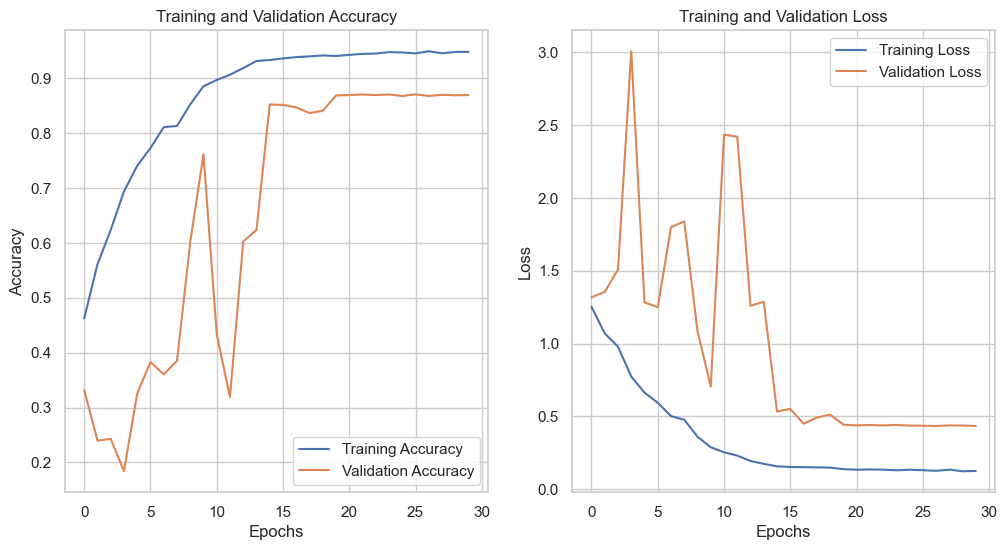

In [21]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

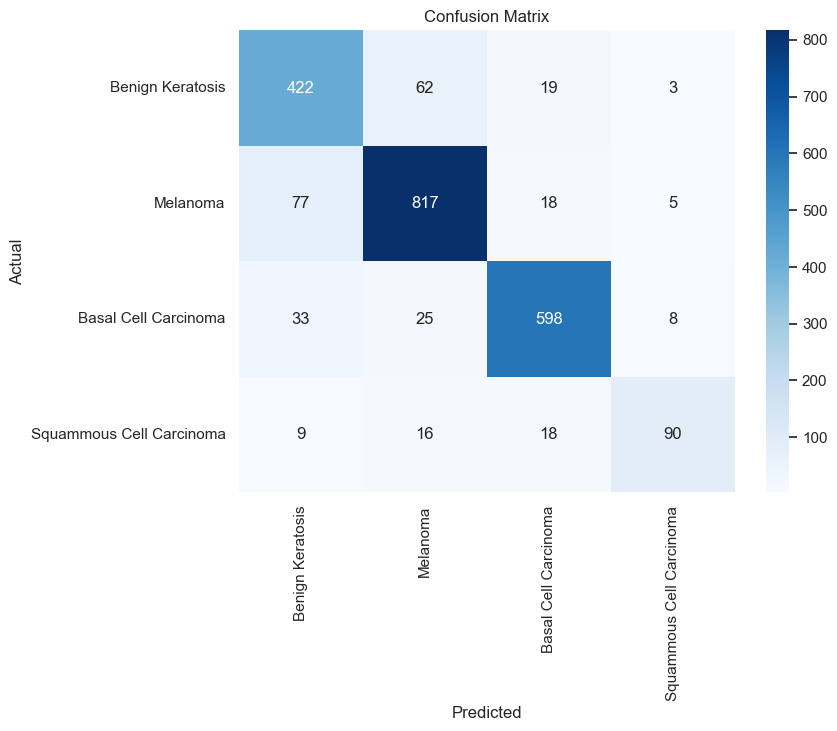

                          precision    recall  f1-score   support

        Benign Keratosis       0.78      0.83      0.81       506
                Melanoma       0.89      0.89      0.89       917
    Basal Cell Carcinoma       0.92      0.90      0.91       664
Squammous Cell Carcinoma       0.85      0.68      0.75       133

                accuracy                           0.87      2220
               macro avg       0.86      0.83      0.84      2220
            weighted avg       0.87      0.87      0.87      2220



In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test dataset
predicted_probs = skincancermodel.predict([x_test, ages_test, sexes_test_encoded, anatomical_sites_test_encoded], batch_size=16, verbose=0)

# Extract the true labels
y_true = np.argmax(y_test_one_hot, axis=1)

# Extract the predicted labels
y_pred = np.argmax(predicted_probs, axis=1)

# Calculate the confusion matrix using true and predicted labels
confusion_mtx = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = ['Benign Keratosis', 'Melanoma', 'Basal Cell Carcinoma','Squammous Cell Carcinoma']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute the classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

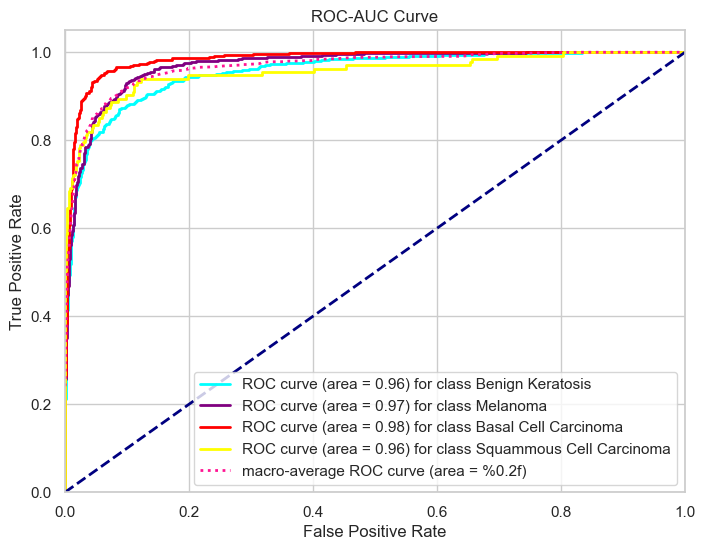

In [23]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(class_labels)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
lw = 2
colors = cycle(['aqua', 'purple', 'red','yellow'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], class_labels[i]))

plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', lw=lw,
         label='macro-average ROC curve (area = %0.2f)')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
# Define the paths to the directories on your local machine
benignkeratosistest_directory = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\testing\\BenignKeratosisTest"
melanomatest_directory = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\testing\\MelanomaTest"
basalcelltest_directory = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\testing\\BasalCellCarcinomaTest"
squamoustest_directory="C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\testing\\SquamousCellCarcinomaTest"
# List the files and directories in each of the specified directories
benigntestimages=os.listdir(benignkeratosistest_directory)
melanomatestimages = os.listdir(melanomatest_directory)
basaltestimages = os.listdir(basalcelltest_directory)
squamoustestimages=os.listdir(squamoustest_directory)
benigntest_count = len(benigntestimages)
melanomatest_count = len(melanomatestimages)
basaltest_count = len(basaltestimages)
squamoustest_count = len(squamoustestimages)
totaltest_count=benigntest_count+melanomatest_count+basaltest_count+squamoustest_count
print('The total no of images:',totaltest_count)

The total no of images: 180


In [25]:
import re  # Import the regular expressions module

# Function to load images, assign labels, and metadata
def load_images_labels_metadata(directory, label1, selected_data):
    data1, labels1, ages1, sexes1, anatomical_sites1 = [], [], [], [], []

    for image_path in directory.glob('*.jpg'):
        if image_path.is_file():
            image_name = image_path.stem  # Get the image filename without the extension
            try:
                image = cv2.imread(str(image_path))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (224, 224))
                data1.append(image)
                labels1.append(label1)

                # Extract the common subportion from the image name
                match = re.search(r'ISIC_(\d+)', image_name)
                if match:
                    subportion = match.group(1)
                    # Find the corresponding metadata in selected_data based on the subportion
                    metadata_entry = selected_data[selected_data['image'].str.contains(subportion)]
                    if not metadata_entry.empty:
                        age1 = metadata_entry['age_approx'].values[0]
                        sex1 = metadata_entry['sex'].values[0]
                        anatomical_site1 = metadata_entry['anatom_site_general'].values[0]
                        if pd.isna(anatomical_site1):
                            anatomical_site1 = 'unknown'
                        if pd.isna(age1):
                            age1 = -1  # Replace missing age with -1 or any other suitable placeholder
                        if pd.isna(sex1):
                            sex1 = 'unknown'  # Replace missing sex with 'unknown'
                        ages1.append(age1)
                        sexes1.append(sex1)
                        anatomical_sites1.append(anatomical_site1)
                        print(f"Loaded image: {image_path.name} with label {label1}, age {age1}, sex {sex1}, site {anatomical_site1}, size: {image.shape}")
                    else:
                        print(f"Error: No matching subportion found in image name: {image_path.name}")
                        ages1.append(-1)  # Replace missing age with -1 or any other suitable placeholder
                        sexes1.append('unknown')  # Replace missing sex with 'unknown'

            except AttributeError:
                print(f"Error loading image: {image_path.name}")

    return data1, labels1, ages1, sexes1, anatomical_sites1
# Load images and assign labels, age, sex, and anatomical site using the extracted metadata
benign_data1, benign_labels1, benign_ages1, benign_sexes1, benign_sites1 = load_images_labels_metadata(Path(benignkeratosistest_directory), 0, selected_data)
melanoma_data1, melanoma_labels1, melanoma_ages1, melanoma_sexes1, melanoma_sites1 = load_images_labels_metadata(Path(melanomatest_directory), 1, selected_data)
basal_data1, basal_labels1, basal_ages1, basal_sexes1, basal_sites1 = load_images_labels_metadata(Path(basalcelltest_directory), 2, selected_data)
squamous_data1, squamous_labels1,squamous_ages1, squamous_sexes1, squamous_sites1 = load_images_labels_metadata(Path(squamoustest_directory), 3, selected_data)

# Combine data and labels for all categories
data1 = np.concatenate((benign_data1, melanoma_data1, basal_data1,squamous_data1), axis=0)
labels1 = np.concatenate((benign_labels1, melanoma_labels1, basal_labels1,squamous_labels1), axis=0)
ages1 = np.concatenate((benign_ages1, melanoma_ages1, basal_ages1,squamous_ages1), axis=0)
sexes1 = np.concatenate((benign_sexes1, melanoma_sexes1, basal_sexes1,squamous_sexes1), axis=0)
anatomical_sites1 = np.concatenate((benign_sites1, melanoma_sites1, basal_sites1,squamous_sites1), axis=0)

# Verify the shape of the data and labels arrays
print("Data shape:", data1.shape)
print("Labels shape:", labels1.shape)
print("Ages shape:", ages1.shape)
print("Sexes shape:", sexes1.shape)
print("Anatomical Sites shape:", anatomical_sites1.shape)

Loaded image: benignkeratosis_ISIC_0012086_downsampled.jpg with label 0, age 30.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012117_downsampled.jpg with label 0, age 65.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012136_downsampled.jpg with label 0, age 70.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012199_downsampled.jpg with label 0, age 70.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012215_downsampled.jpg with label 0, age 85.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012272_downsampled.jpg with label 0, age 45.0, sex female, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012323_downsampled.jpg with label 0, age 65.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012372_downsampled.jpg with label 0, age 65.0, sex female, site unknown

Loaded image: melanoma_ISIC_0027552.jpg with label 1, age 40.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028228.jpg with label 1, age 75.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028965.jpg with label 1, age 50.0, sex male, site unknown, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030187.jpg with label 1, age 35.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030211.jpg with label 1, age 80.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032424.jpg with label 1, age 70.0, sex female, site posterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033498.jpg with label 1, age 50.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053454.jpg with label 1, age 55.0, sex male, site anterior torso, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053510.jpg with label 1, age 40.0, sex female, sit

Loaded image: squamouscell_ISIC_0056621.jpg with label 3, age 65.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0057294.jpg with label 3, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0057426.jpg with label 3, age 65.0, sex male, site upper extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0057770.jpg with label 3, age 45.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0059700.jpg with label 3, age 50.0, sex female, site lower extremity, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0060131.jpg with label 3, age 85.0, sex male, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0060366.jpg with label 3, age 80.0, sex female, site head/neck, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0061046.jpg with label 3, age 85.0, sex female, site anterior torso, size: (224, 224, 3)
Loaded image: squamouscell_ISIC_0062951.jpg with label 3, age 7

In [26]:
unique_values = np.unique(anatomical_sites1)
print(unique_values)

['anterior torso' 'head/neck' 'lateral torso' 'lower extremity'
 'palms/soles' 'posterior torso' 'unknown' 'upper extremity']


In [27]:
x_test1 = data1.astype('float32')/255
y_test1=to_categorical(labels1,4)
# One-hot encode 'sex' and 'anatomical_sites'
# One-hot encode 'sex' without a "missing" category
sex_one_hot1 = pd.get_dummies(sexes1, prefix='sex')
# One-hot encode 'anatomical_sites' with a "missing" category
anatomical_sites_one_hot1 = pd.get_dummies(anatomical_sites1, prefix='site', dummy_na=True)

# Fill missing values with 0 (or any other suitable placeholder)
anatomical_sites_one_hot1.fillna(0, inplace=True)

# Ensure the DataFrame has 9 columns (including "missing")
anatomical_sites_one_hot1 = anatomical_sites_one_hot1.reindex(columns=['site_head/neck', 'site_anterior torso', 'site_lateral torso', 'site_lower extremity', 'site_palms/soles', 'site_posterior torso', 'site_nan', 'site_upper extremity', 'site_unknown'], fill_value=0)


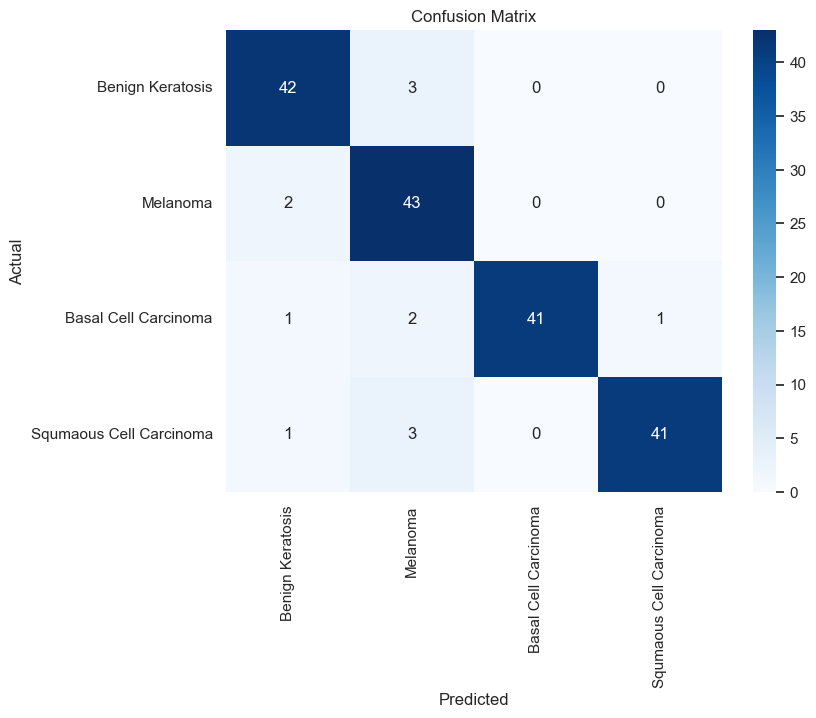

                         precision    recall  f1-score   support

       Benign Keratosis       0.91      0.93      0.92        45
               Melanoma       0.84      0.96      0.90        45
   Basal Cell Carcinoma       1.00      0.91      0.95        45
Squmaous Cell Carcinoma       0.98      0.91      0.94        45

               accuracy                           0.93       180
              macro avg       0.93      0.93      0.93       180
           weighted avg       0.93      0.93      0.93       180



In [28]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test dataset
predicted_probs1 = skincancermodel.predict([x_test1, ages1, sex_one_hot1, anatomical_sites_one_hot1], batch_size=16, verbose=0)

# Extract the true labels for the testing data
y_true1 = np.argmax(y_test1, axis=1)

# Extract the predicted labels for the testing data
y_pred1 = np.argmax(predicted_probs1, axis=1)

# Calculate the confusion matrix using true and predicted labels for the testing data
confusion_mtx1 = confusion_matrix(y_true1, y_pred1)

# Define class labels
class_labels1 = ['Benign Keratosis', 'Melanoma', 'Basal Cell Carcinoma','Squmaous Cell Carcinoma']

# Plot the confusion matrix for the testing data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx1, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels1, yticklabels=class_labels1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute the classification report for the testing data
report1 = classification_report(y_true1, y_pred1, target_names=class_labels1)
print(report1)